## Exercise 3.4

Design low-pass FIR filter with cutoff frequency $f_c=f_1$.

Write code that applies the designed filter using the *Overlap-Add* method.

Write code that applies the designed filter using the *Overlap-Save* method.

Save filtered signals to WAVE files. Plot the spectrograms of each signal before and after filtering.

In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
t = 0.6
fs = 16000

sample_count = int(t * fs)
plot_samples = 300

# amplitudes:
amps = [2, 3, 1]

# frequency components:
freqs = [900, 1400, 6100]

# initial signal (s1)
n = np.arange(sample_count)

# sum of all (three) sinusoids
s = sum([a * np.sin(2 * np.pi * n * f / fs) for f, a in zip(freqs, amps)])


In [3]:
def overlap_add(x, kernel, N):
    ''' Overlap-Add method of filtering
        In:  x      - signal to filter
             kernel - FIR filter kernel of size M
             N      - overlap size: N+M-1 should be a power of 2
        Out: y      - filtered signal
    '''
    M = len(kernel)
    L = len(x)
    
    filter_fr = np.fft.fft(kernel, n=N+M-1)

    y = np.zeros(L + M - 1)
    start_pos = 0
    while start_pos < L - N:
        A = np.fft.fft(x[start_pos:start_pos + N], n=N+M-1)
        C = A * filter_fr
        conv = np.real(np.fft.ifft(C))
        y[start_pos:start_pos + N+M-1] += conv[:N+M-1]
        start_pos += N

    # OA for last frame (this part can be omitted)
    A = np.fft.fft(x[start_pos:], n = N+M-1)
    C = A * filter_fr
    conv = np.real(np.fft.ifft(C))
    y[start_pos:] += conv[:L+M-1 - start_pos]

    return y
    

def overlap_save(x, kernel, N):
    ''' Overlap-Save method of filtering
        In:  x      - signal to filter
             kernel - FIR filter kernel of size M
             N      - overlap size: N+M-1 should be a power of 2
        Out: y      - filtered signal
    '''
    M = len(kernel)
    N += M - 1
    L = len(x)
    
    filter_fr = np.fft.fft(kernel, n=N)
    
    y = np.zeros(L)
    start_pos = 0
    while start_pos < L - N:
        A = np.fft.fft(x[start_pos:start_pos + N], n=N)
        C = A * filter_fr
        conv = np.real(np.fft.ifft(C))
        y[start_pos:start_pos + N-M+1] = conv[M-1:]
        start_pos += N - M + 1
    
    # OS for last frame (this part can be omitted)
    A = np.fft.fft(x[start_pos:], n=N)
    C = A * filter_fr
    conv = np.real(np.fft.ifft(C))
    y[start_pos:] = conv[M-1:M-1+L - start_pos]

    return y


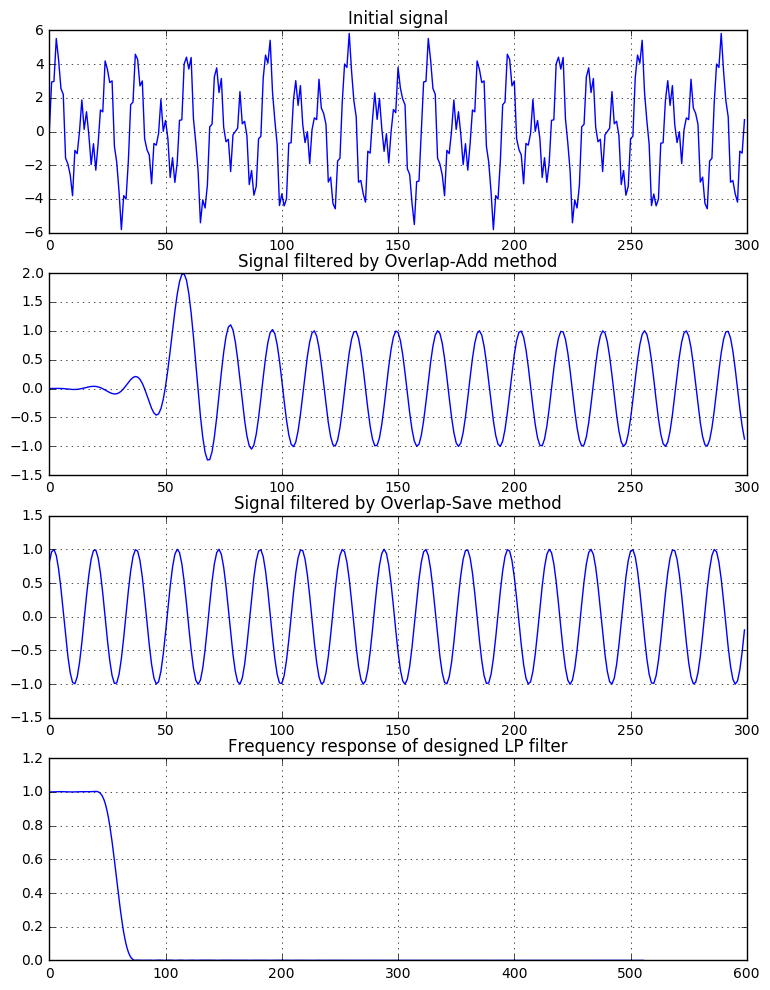

In [4]:
# overlap_size + kernel_size - 1 = 512

kernel_size = 113
overlap_size = 400               

cutoff = 2 * freqs[0] / fs

# lowpass filter design via firwin()

kernel = sig.firwin(kernel_size, cutoff)
w, h = sig.freqz(kernel)

filtered1 = overlap_add(s, kernel, overlap_size)
filtered2 = overlap_save(s, kernel, overlap_size)


plt.subplots(4, 1, figsize=(9, 12))

plt.subplot(411)
plt.title("Initial signal")
plt.plot(s[:plot_samples])
plt.grid()

plt.subplot(412)
plt.title(("Signal filtered by Overlap-Add method"))
plt.plot(filtered1[:plot_samples])
plt.grid()

plt.subplot(413)
plt.title(("Signal filtered by Overlap-Save method"))
plt.plot(filtered2[:plot_samples])
plt.grid()

plt.subplot(414)
plt.title(("Frequency response of designed LP filter"))
plt.plot(np.abs(h))
plt.grid()


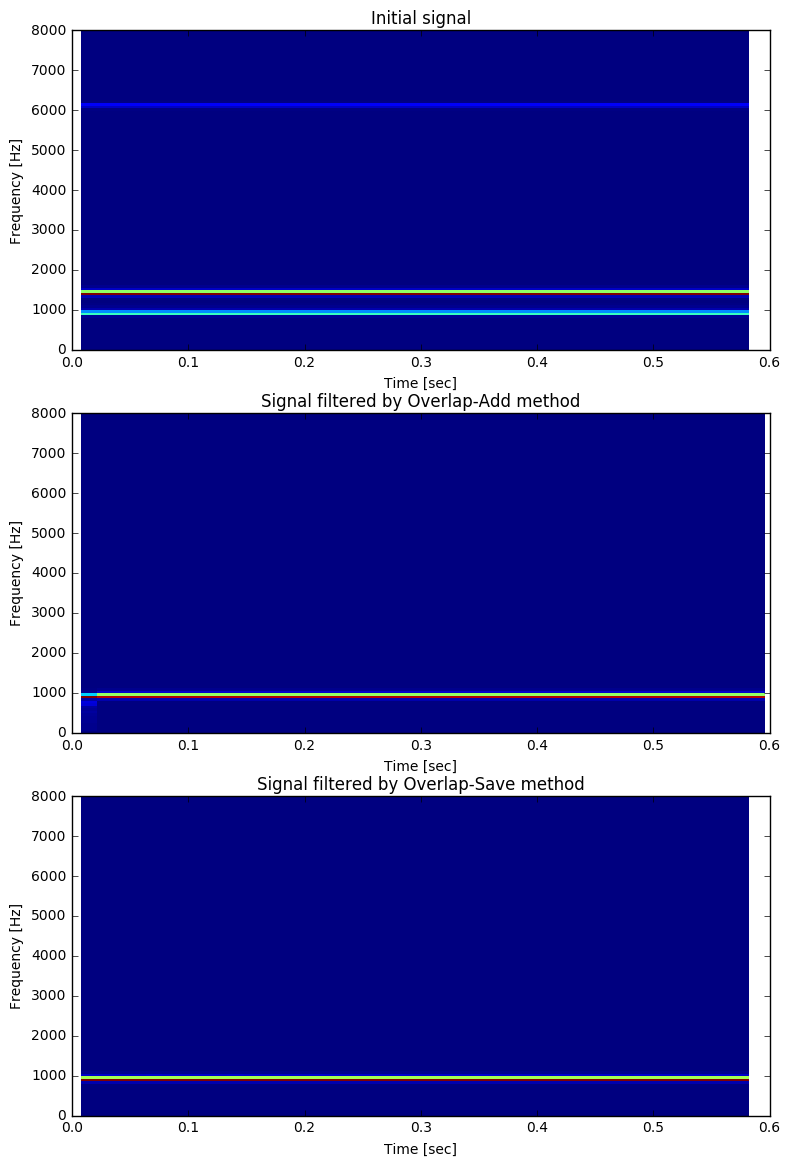

In [5]:
plt.subplots(3, 1, figsize=(9, 14))

plt.subplot(311)
plt.title("Initial signal")
f, t, Sxx = sig.spectrogram(s, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(312)
plt.title("Signal filtered by Overlap-Add method")
f, t, Sxx = sig.spectrogram(filtered1, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(313)
plt.title("Signal filtered by Overlap-Save method")
f, t, Sxx = sig.spectrogram(filtered2, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
